# Make Animation from pickels files

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import platform
from joblib import Parallel, delayed

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'

In [2]:
import multiprocessing
from joblib import Parallel, delayed
num_jobs=30

In [3]:
## Task specific imports
import os as os
#import keras.utils as image
import glob
from PIL import Image, ImageDraw
import pickle

In [4]:
import math
 

## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [5]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer ==  "SciClone":
    rootfolder = '/sciclone/scr10/dchendrickson01/EFIT/'
    
else:
    asdfasdf

## Load data

In [144]:
Case = '20m10xTopHit'

CasesAtaTime = 2
FilesAtTime = 5
ProcessPerFile = 5
Position = 0 #0 Energy, 1 X axis, 2 Y Axis, 3 X axis
skips = 2 #1 every data point, or skip what modulous
SkipToLaser = 10

imFolder=rootfolder+Case+'/'
fileNames = glob.glob(imFolder+'Movements*.p')

Views=[]

In [145]:
fileName = imFolder+'Parameters.p'

file=open(fileName,'rb')
Parameters=pickle.load(file)

file.close()


In [146]:
xmax = Parameters["LargestXnode"]
ymax = Parameters["LargestYnode"]
zmax = Parameters["LargestZnode"]
gridStartWeb = Parameters["WidthStartWebNode"]
gridEndWeb = Parameters["WidthEndWebNode"]
gridEndFoot = Parameters["HeightEndFootNode"]
gridStartHead = Parameters["HeightStartHeadNode"]
gridStartHeadWidth = Parameters["WidthStartHeadNode"]
gridEndHeadWidth = Parameters["WidthEndHeadNode"]
DataBucketSize = Parameters["SaveEveryXStep"]

In [147]:
Parameters

{'AirCut': False,
 'RailShape': True,
 'Flaw': False,
 'Length': 5,
 'Width': 0.1524,
 'Height': 0.1524,
 'SaveFolder': '/sciclone/scr10/dchendrickson01/EFIT/20m10xTopHit/',
 'RunTitle': '20m Rail At 10x long for 1k FP Top Hit',
 'TiesIncluded': 0,
 'GridDesignFrequency': 49720,
 'InputSignalFrequency': 16300,
 'SimulationCycleLength': 60,
 'ForcingFuctionNumber': 1,
 'PerWheelForce': 173000,
 'PoisonsRatio': 0.29,
 'YoungsModulous': 200000000000,
 'MaterialDensity': 7800,
 'LongitudinalWaveSpeed': 5796.653896162343,
 'TransverseWaveSpeeed': 3152.519949406393,
 'TimeStep': 4.999551943731741e-07,
 'RunTime': 0.0010444064010455606,
 'TimeStepsSimLength': 2089,
 'GridLengthNodes': 952,
 'GridWidthNodes': 30,
 'GridHeightNodes': 30,
 'LargestXnode': 947,
 'LargestYnode': 29,
 'LargestZnode': 29,
 'SaveEveryXStep': 150,
 'HeightStartHeadNode': 19,
 'WidthStartWebNode': 11,
 'WidthEndWebNode': 18,
 'HeightEndFootNode': 6,
 'WidthStartHeadNode': 5,
 'WidthEndHeadNode': 24,
 'AbsorberLengthNod

## Specific Functions

In [148]:
def getPreStrippedData(fileName):
    file=open(fileName,'rb')
    temp = pickle.load(file)
    file.close()
    
    return temp

## make all the frames of all the cases

In [149]:
fileNames = glob.glob(imFolder+'Data*.p')

In [150]:
for i in range(len(fileNames)):
    print(i,fileNames[i].split('-')[1].split('.')[0])

0 EndM4
1 EndM4y
2 EndM2
3 EndM2y
4 EndM2x
5 WebStart
6 WebEnd
7 TopSurface
8 HeadEnd
9 LeftHead
10 MiddleVerticalPlanex
11 MiddleVerticalPlaney
12 MiddleVerticalPlanez
13 MiddleVerticalPlaneE
14 RightHead
15 EndM6
16 HeadStart
17 MiddleHeadPlane
18 MiddleWebPlane
19 MiddleVerticalPlane


In [162]:
fileIndex = 7

In [163]:
Data = getPreStrippedData(fileNames[fileIndex])

In [164]:
Data.shape

(952, 30, 151)

In [165]:
xs = 0
xe = Data.shape[0]
ts = 0
te = Data.shape[2]
tt = 1

EMin = np.min(Data[xs:xe,:,ts:te])
EMax = np.max(Data[xs:xe,:,ts:te])
v = np.linspace(EMin, EMax, 30, endpoint=True)[0:20]

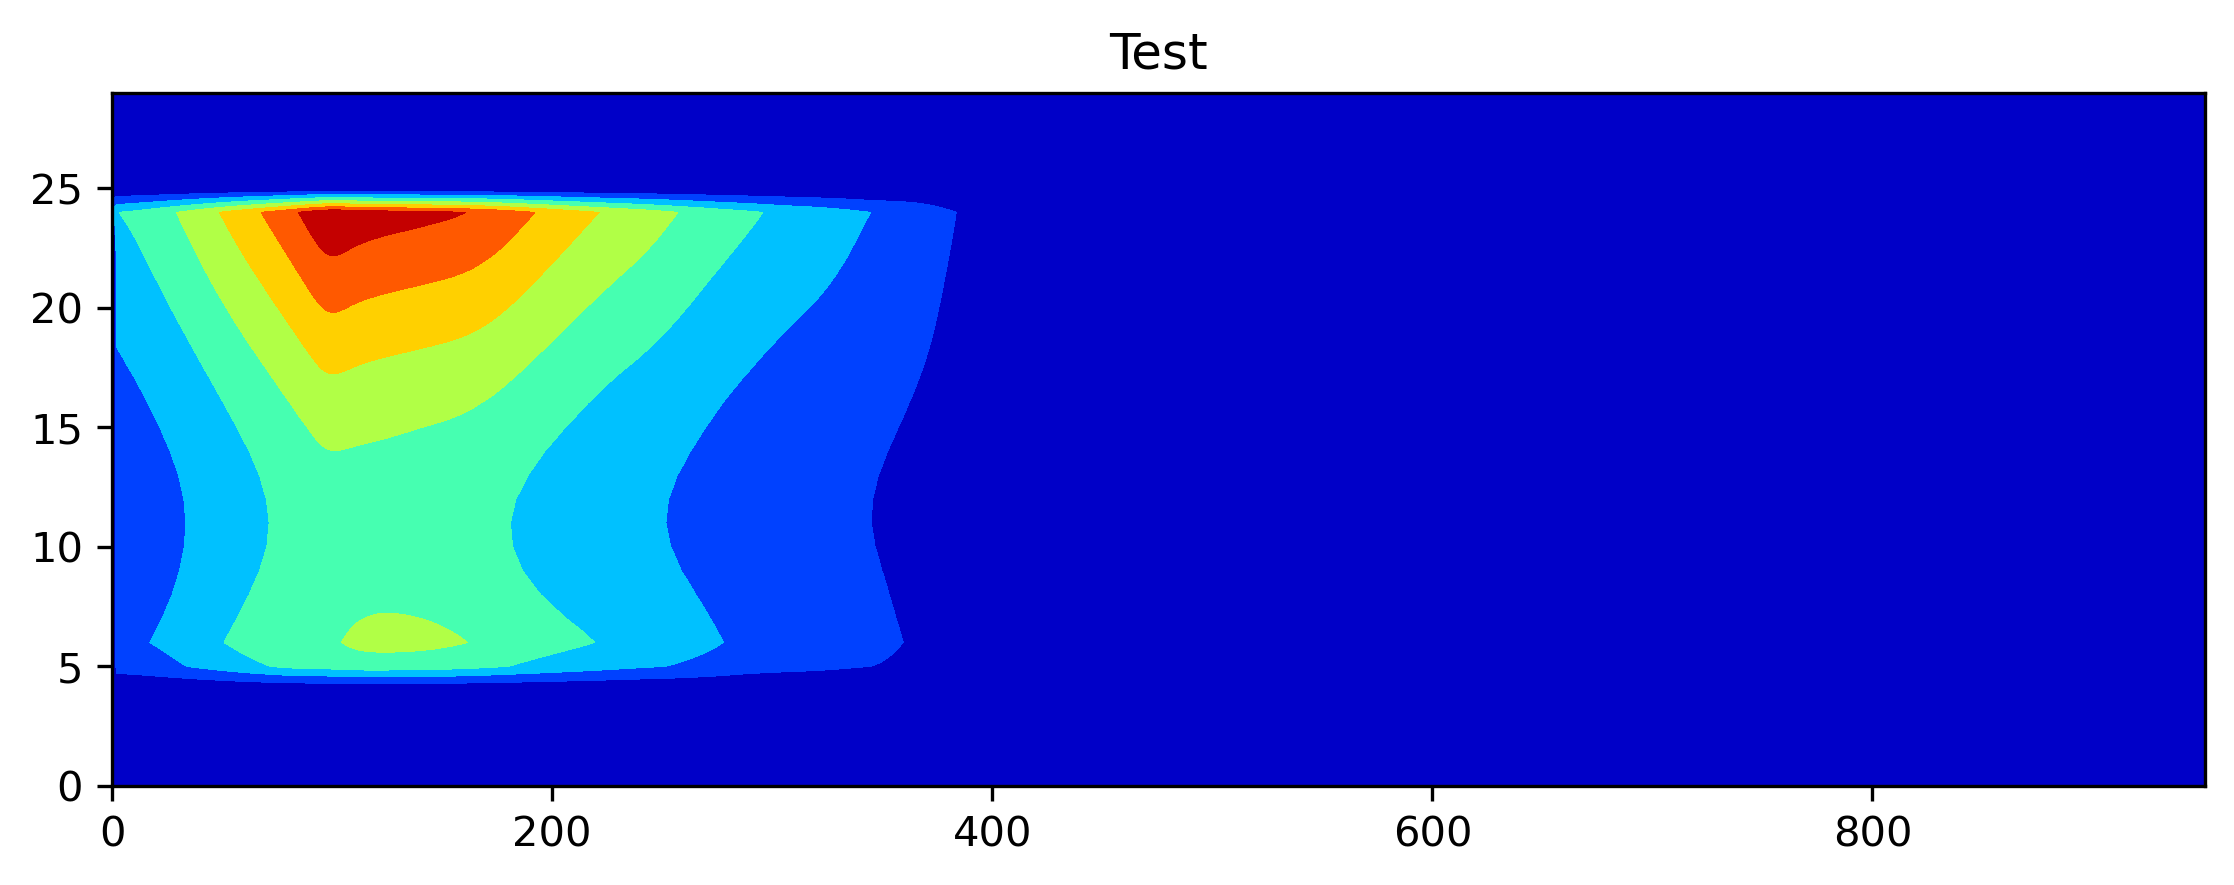

In [166]:
fig = plt.figure(figsize=(9,3), dpi=300)

plt.contourf(Data[:,:,149].T, cmap=plt.cm.jet)
plt.title('Test')
plt.show()

In [157]:
row = 14

In [159]:
for i in range(Data.shape[0]):
    print(i,Data[i,row,149])

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 0.0
11 1.1214713415928936e-17
12 2.9402239290454854e-16
13 3.1231322253380116e-16
14 3.267311572269618e-16
15 3.3750766045082505e-16
16 3.453305483113295e-16
17 3.51227561116229e-16
18 3.55693581029024e-16
19 0.0
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan


In [160]:
CS = 17
CE = 27

CS=11
CE=18

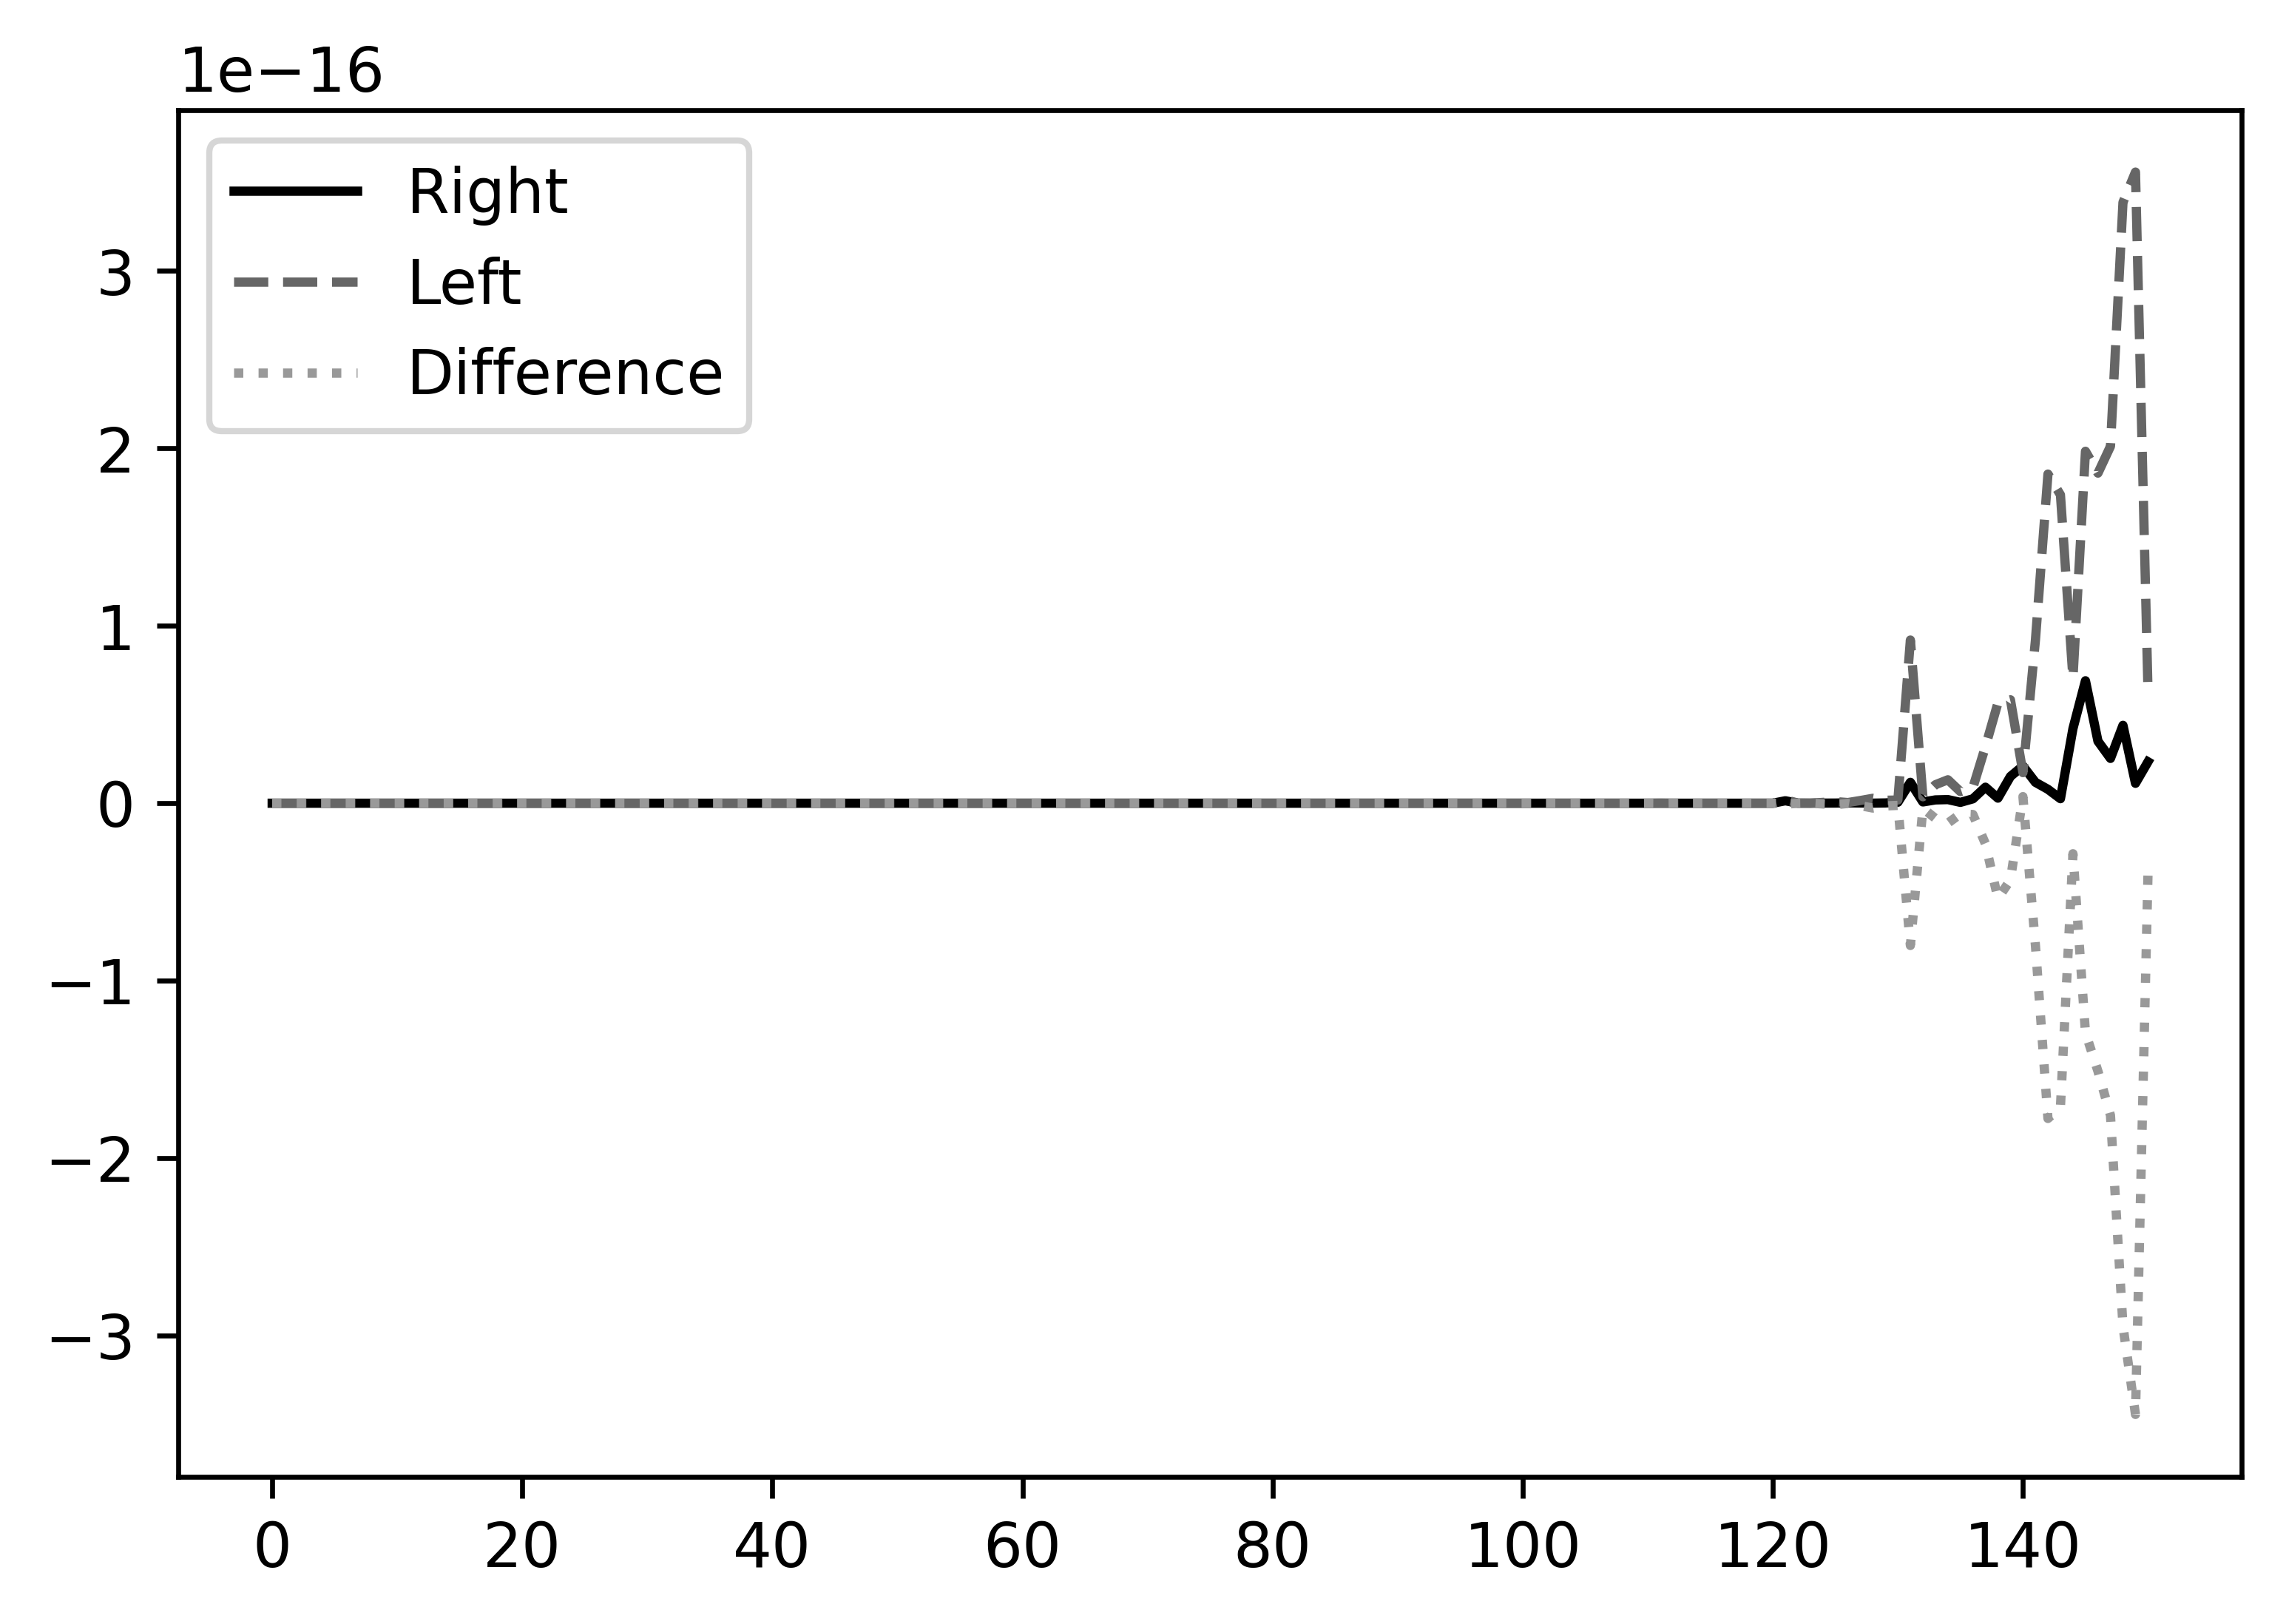

In [161]:
fig = plt.figure(figsize=(6,4),dpi=600)
plt.plot(Data[CS,row,:],label='Right')
plt.plot(Data[CE,row,:],label='Left')
plt.plot(Data[CS,row,:]-Data[CE,row], label='Difference')
plt.legend()
plt.show()

## FingerPrinting

In [74]:
import CoreFunctions as cf

In [122]:
Wvlt = 'db5'
NumScales=300
start = 0

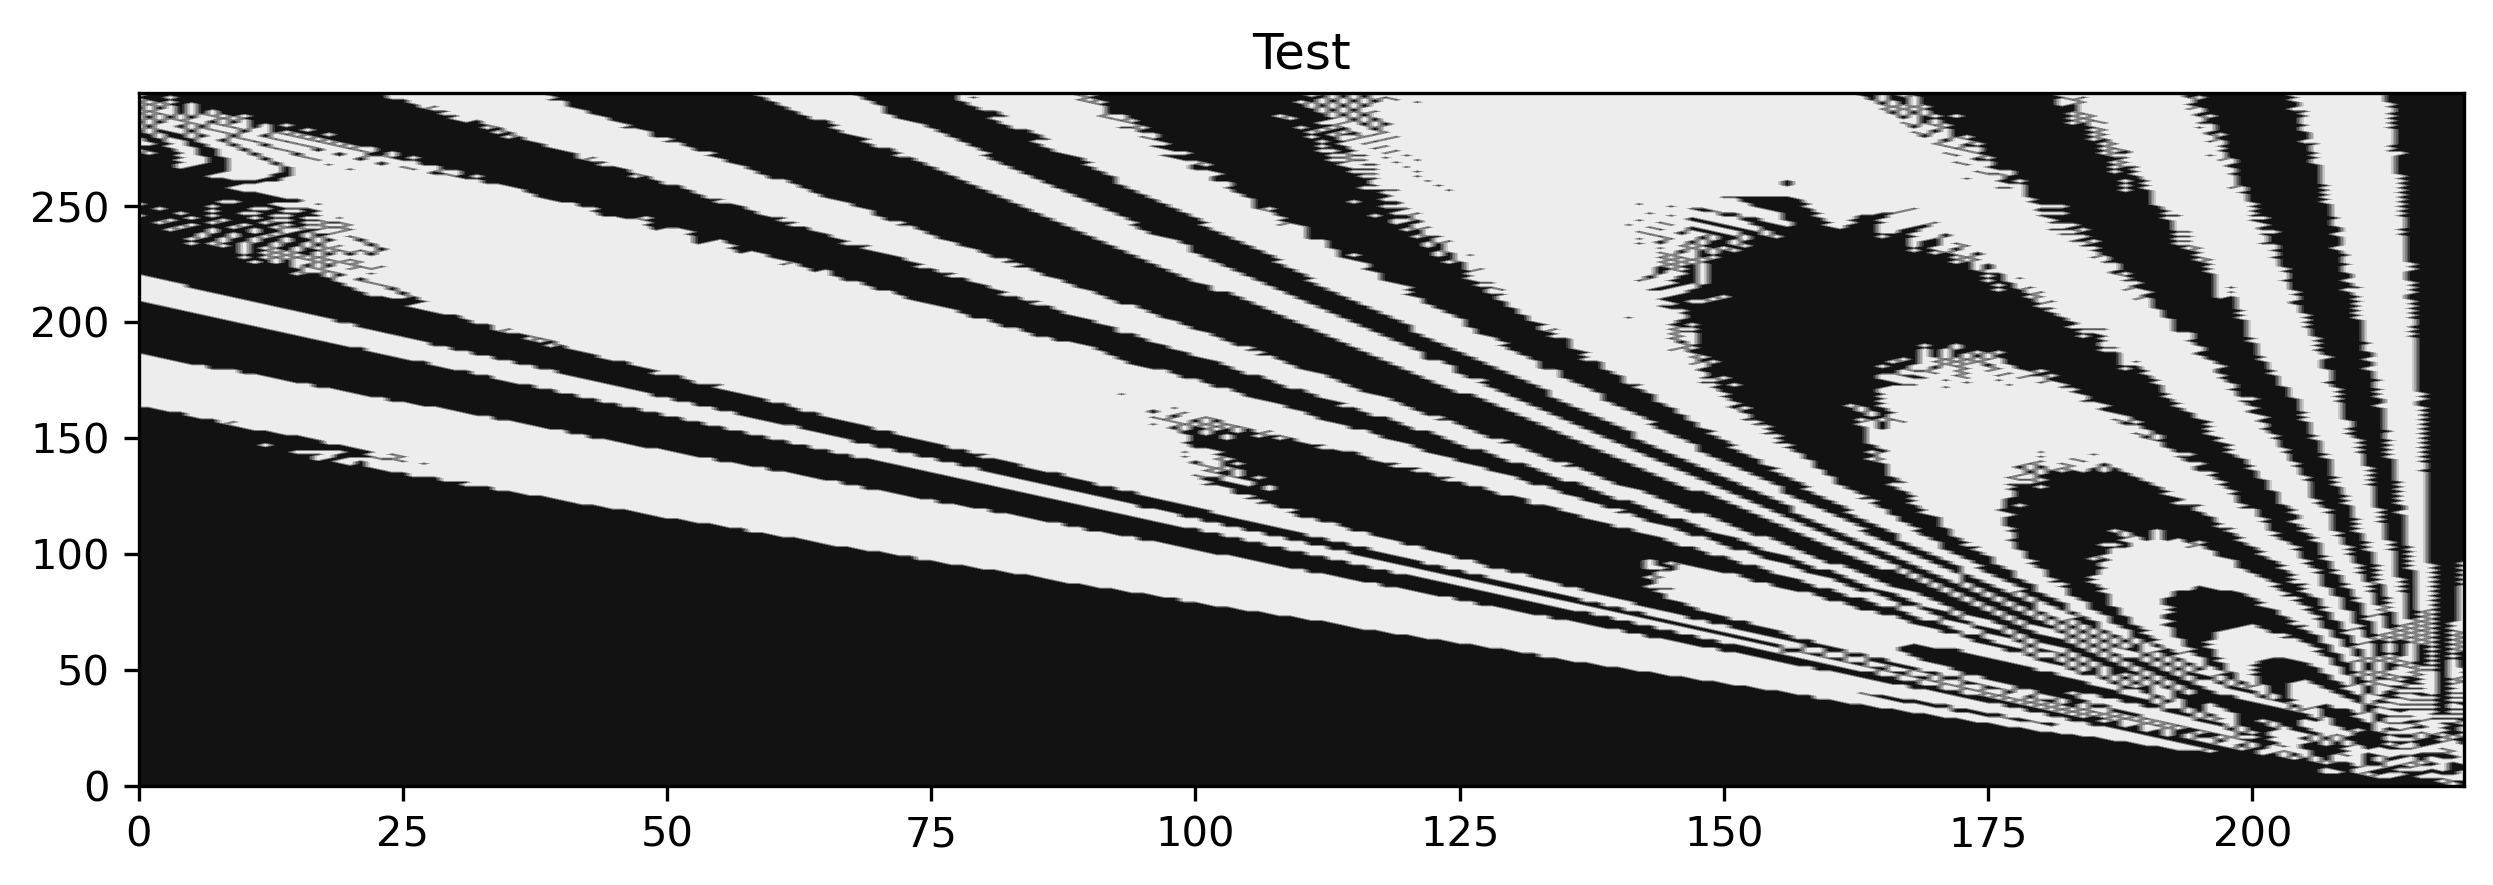

In [123]:
TP1 = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:],3), wvt=Wvlt, ns=NumScales, scalespace = 1, numslices=10, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()


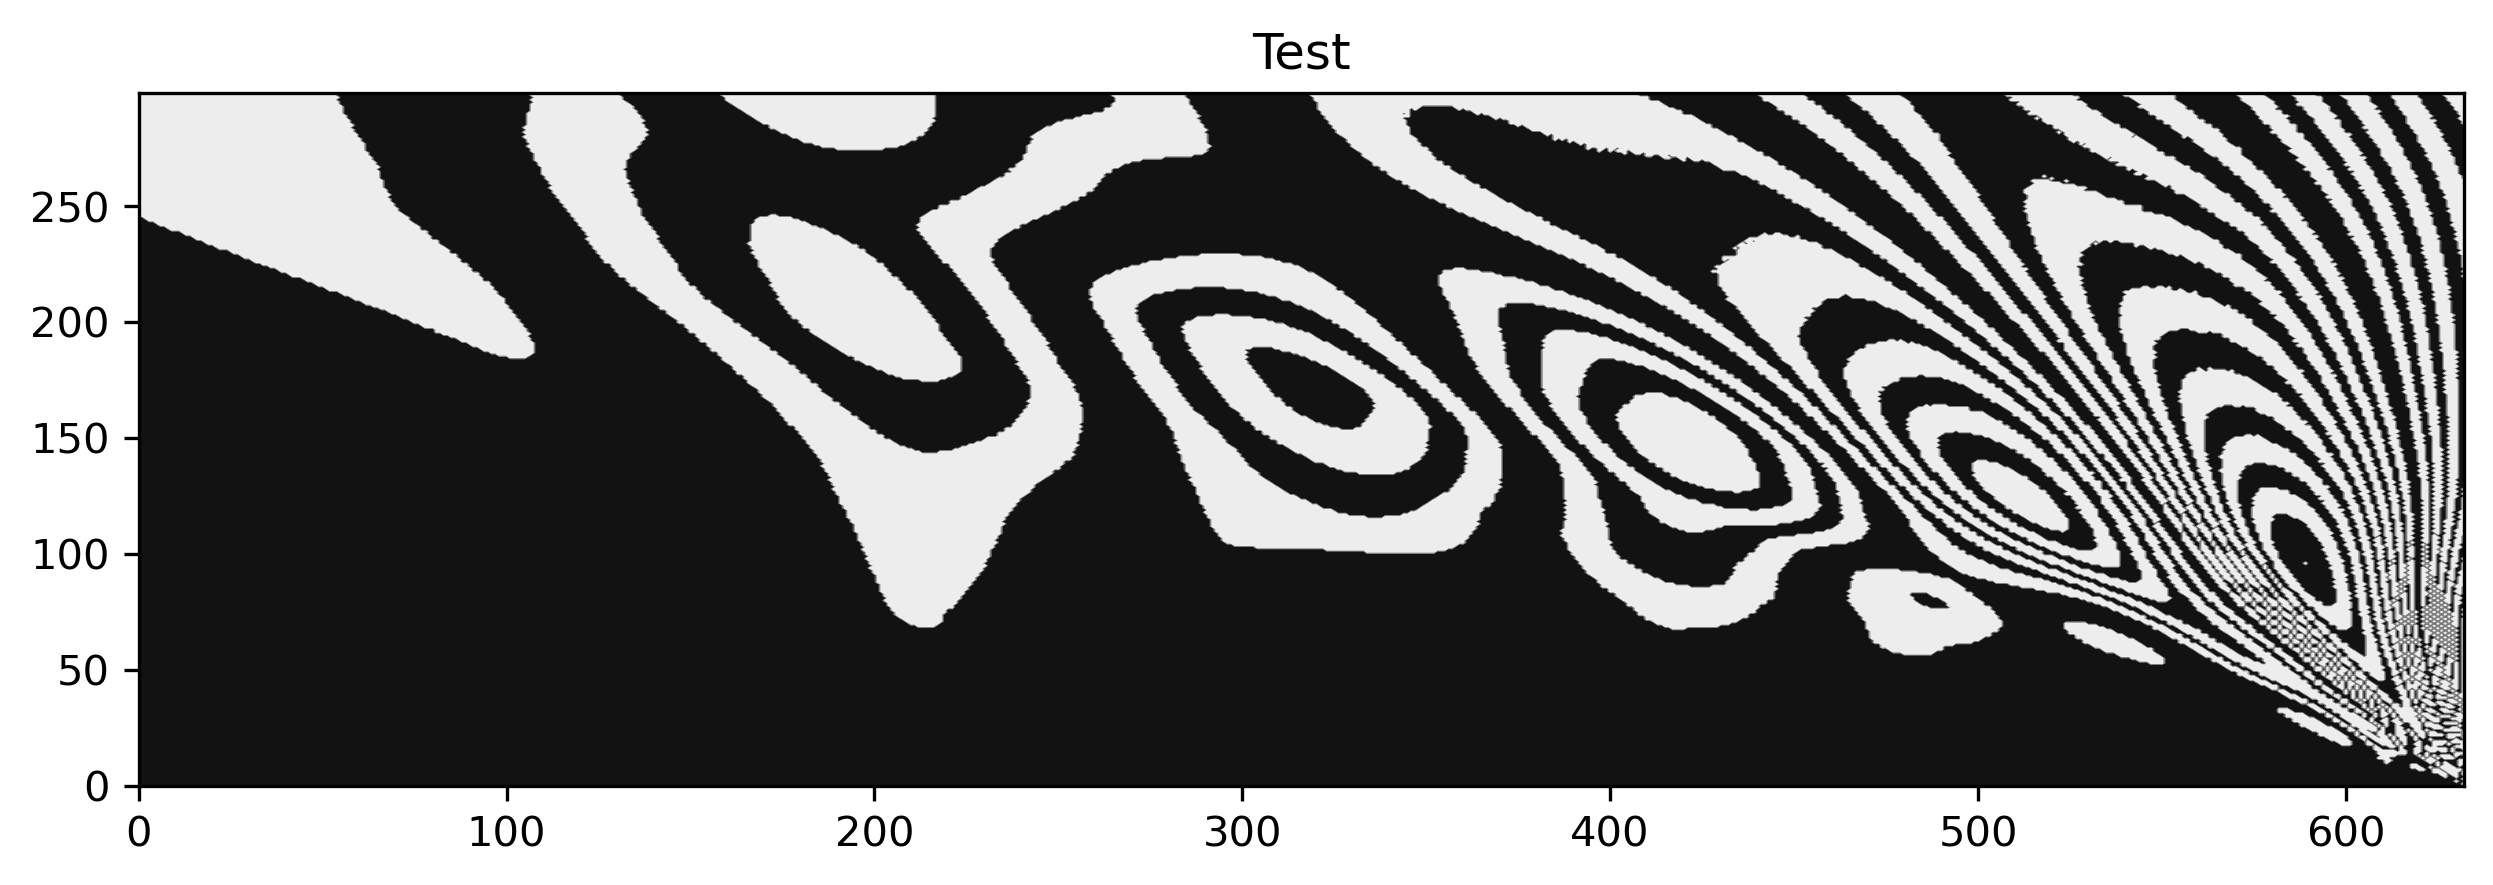

In [98]:
TP2 = cf.getThumbprint2(cf.Smoothing(Data[CE,row,start:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

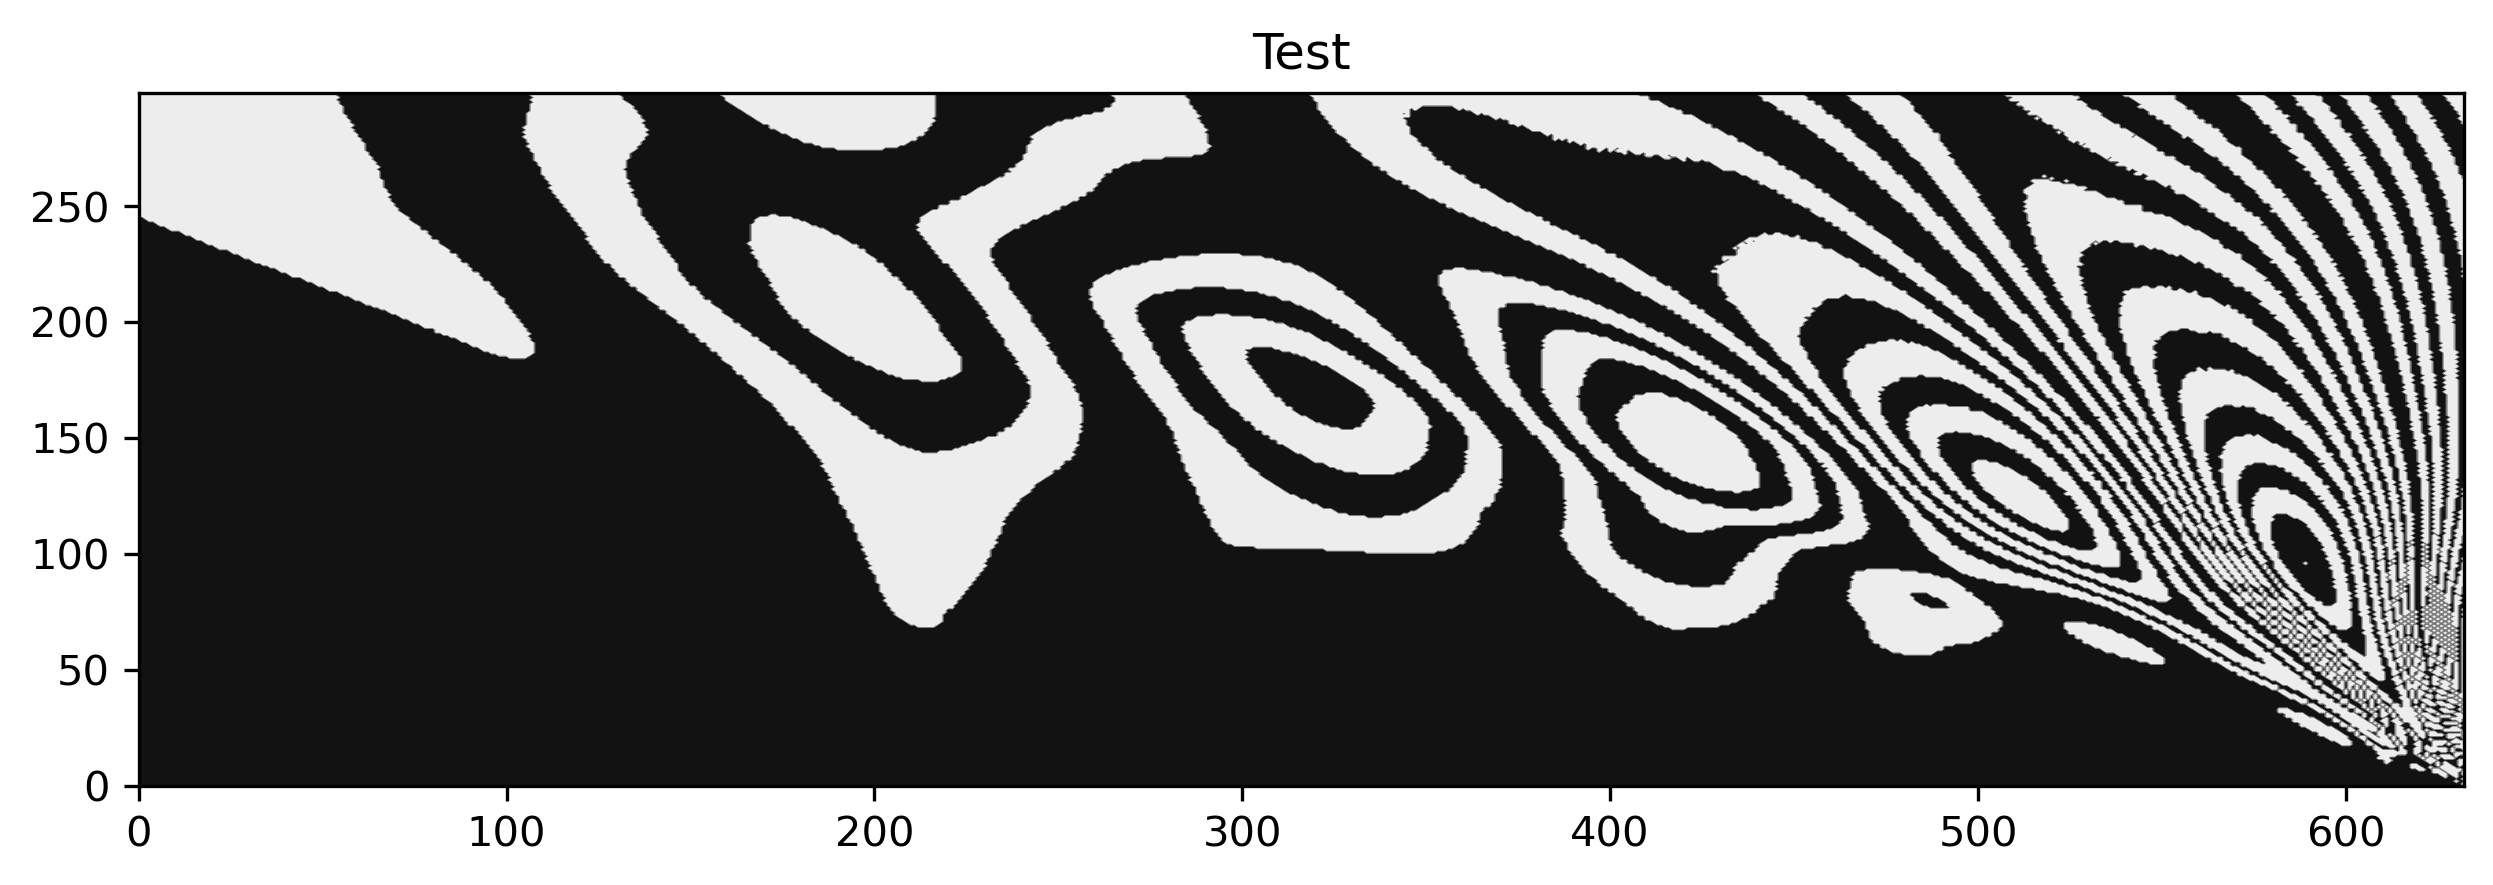

In [99]:
TPD = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:]-Data[CE,row,start:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

## Tangent

In [119]:
from joblib import Parallel, delayed
num_jobs=30

In [122]:
def MakeImages(i):
    fig = plt.figure(figsize=(5,5), dpi=200)
    plt.axis('off')
    plt.contourf(Data[xs:xe,:,i].T, cmap=plt.cm.jet)
    plt.savefig(imFolder+'qAni2/Image_'+str(i).zfill(4)+'.png')
    #plt.show()
    plt.close()
    return i

Sets = np.arange(ts,te,tt)
temp = Parallel(n_jobs=num_jobs)(delayed(MakeImages)(i) for i in Sets)
    

In [123]:
import glob
from PIL import Image

def make_gif(frame_folder):
    file_list = glob.glob(frame_folder+'*.png') # Get all the pngs in the current directory
    list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0]))
    frames = [Image.open(image) for image in file_list]
    frame_one = frames[0]
    frame_one.save(imFolder+fileNames[fileIndex].split('-')[1].split('.')[0]+'.gif',
                   format="GIF", append_images=frames[1:], save_all=True, 
                   duration=int(len(frames)/10), loop=0)

make_gif(imFolder+'qAni2/')
